In [26]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Data Understanding').getOrCreate()

df = spark.read.load('Korea Income and Welfare.csv', format="csv", header=True, inferSchema=True)

In [27]:
df.show()

+-----+----+----+------+-----------+-------------+------+---------+---------------+--------+--------+----------+------------+------------------+
|   id|year|wave|region|     income|family_member|gender|year_born|education_level|marriage|religion|occupation|company_size|reason_none_worker|
+-----+----+----+------+-----------+-------------+------+---------+---------------+--------+--------+----------+------------+------------------+
|10101|2005|   1|     1|      614.0|            1|     2|     1936|              2|       2|       2|          |            |                 8|
|10101|2011|   7|     1|      896.0|            1|     2|     1936|              2|       2|       2|          |            |                10|
|10101|2012|   8|     1|     1310.0|            1|     2|     1936|              2|       2|       2|          |            |                10|
|10101|2013|   9|     1|     2208.0|            1|     2|     1936|              2|       2|       2|          |            |     

In [28]:
print('Number of columns: ', len(df.columns))
print('Total number of rows: ', df.count())

Number of columns:  14
Total number of rows:  92857


In [29]:
df.columns

['id',
 'year',
 'wave',
 'region',
 'income',
 'family_member',
 'gender',
 'year_born',
 'education_level',
 'marriage',
 'religion',
 'occupation',
 'company_size',
 'reason_none_worker']

In [30]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- wave: integer (nullable = true)
 |-- region: integer (nullable = true)
 |-- income: double (nullable = true)
 |-- family_member: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- year_born: integer (nullable = true)
 |-- education_level: integer (nullable = true)
 |-- marriage: integer (nullable = true)
 |-- religion: integer (nullable = true)
 |-- occupation: string (nullable = true)
 |-- company_size: string (nullable = true)
 |-- reason_none_worker: string (nullable = true)



<AxesSubplot:xlabel='education_level', ylabel='income'>

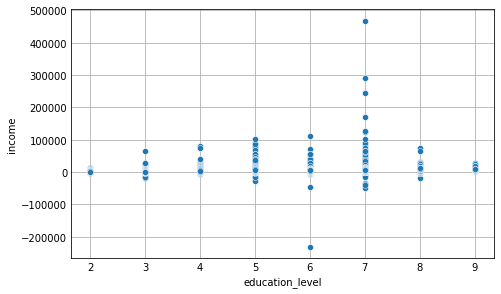

In [31]:
import seaborn as sns
pandasdf=df.toPandas()
sns.scatterplot(data=pandasdf,x="education_level",y='income')

<AxesSubplot:xlabel='region', ylabel='income'>

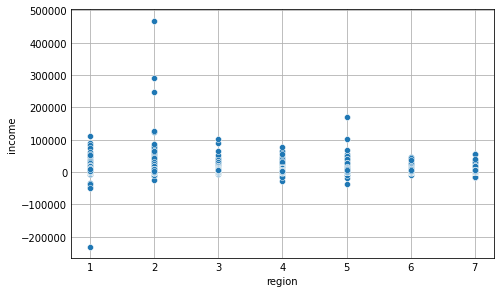

In [32]:
import seaborn as sns
pandasdf=df.toPandas()
sns.scatterplot(data=pandasdf,x="region",y='income')

<AxesSubplot:xlabel='gender', ylabel='income'>

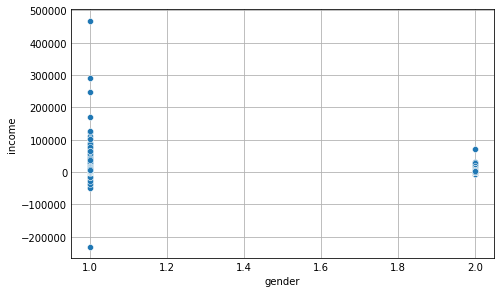

In [33]:
import seaborn as sns
pandasdf=df.toPandas()
sns.scatterplot(data=pandasdf,x="gender",y='income')

In [46]:
from pyspark.sql.functions import col,when
df2=df.select([when(col(c)==" ",None).otherwise(col(c)).alias(c) for c in df.columns])
df2.show()

+-----+----+----+------+-----------+-------------+------+---------+---------------+--------+--------+----------+------------+------------------+
|   id|year|wave|region|     income|family_member|gender|year_born|education_level|marriage|religion|occupation|company_size|reason_none_worker|
+-----+----+----+------+-----------+-------------+------+---------+---------------+--------+--------+----------+------------+------------------+
|10101|2005|   1|     1|      614.0|            1|     2|     1936|              2|       2|       2|      null|        null|                 8|
|10101|2011|   7|     1|      896.0|            1|     2|     1936|              2|       2|       2|      null|        null|                10|
|10101|2012|   8|     1|     1310.0|            1|     2|     1936|              2|       2|       2|      null|        null|                10|
|10101|2013|   9|     1|     2208.0|            1|     2|     1936|              2|       2|       2|      null|        null|     

In [48]:
from pyspark.sql.functions import col, isnan, when, count
df2.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]
          ).show(vertical=True)

-RECORD 0-------------------
 id                 | 0     
 year               | 0     
 wave               | 0     
 region             | 0     
 income             | 0     
 family_member      | 0     
 gender             | 0     
 year_born          | 0     
 education_level    | 0     
 marriage           | 0     
 religion           | 0     
 occupation         | 33643 
 company_size       | 33642 
 reason_none_worker | 60710 

